In [1]:
 %matplotlib inline        
 import numpy as np        
 import matplotlib.pyplot as plt        
 from scipy import stats 
 
       # 用Seaborn画图        
 import seaborn as sns; sns.set()

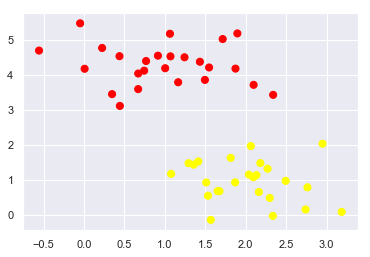

In [2]:
from sklearn.datasets.samples_generator import make_blobs        
X, y = make_blobs(n_samples=50, centers=2,                          
                  random_state=0, cluster_std=0.60)        
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


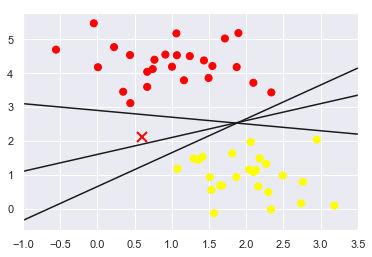

In [3]:
xfit = np.linspace(-1, 3.5)        
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')        
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) 
 
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:            
    plt.plot(xfit, m * xfit + b, '-k') 
 
plt.xlim(-1, 3.5);

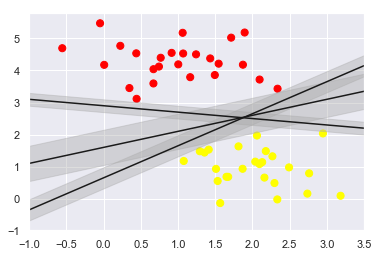

In [4]:
xfit = np.linspace(-1, 3.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
 
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:     
    yfit = m * xfit + b     
    plt.plot(xfit, yfit, '-k')     
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA',                      
                     


In [5]:
 from sklearn.svm import SVC # "Support vector classifier"        
 model = SVC(kernel='linear', C=1E10)        
 model.fit(X, y) 

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):            
    """画二维SVC的决策函数"""            
    if ax is None:                
        ax = plt.gca()            
    xlim = ax.get_xlim()            
    ylim = ax.get_ylim() 
 
    # 创建评估模型的网格            
    x = np.linspace(xlim[0], xlim[1], 30)            
    y = np.linspace(ylim[0], ylim[1], 30)            
    Y, X = np.meshgrid(y, x)            
    xy = np.vstack([X.ravel(), Y.ravel()]).T            
    P = model.decision_function(xy).reshape(X.shape) 
 
    # 画决策边界和边界            
    ax.contour(X, Y, P, colors='k', 
         levels=[-1, 0, 1], alpha=0.5, 
         linestyles=['--', '-', '--']) 
 
    # 画支持向量            
    if plot_support:                
        ax.scatter(model.support_vectors_[:, 0],                           
                   model.support_vectors_[:, 1],                           
                   s=300, linewidth=1, facecolors='none');            
        ax.set_xlim(xlim)            
        ax.set_ylim(ylim) 

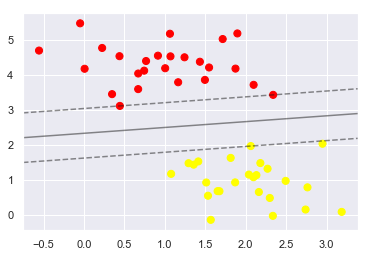

In [7]:
 plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')        
 plot_svc_decision_function(model);


In [8]:
 model.support_vectors_ 

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

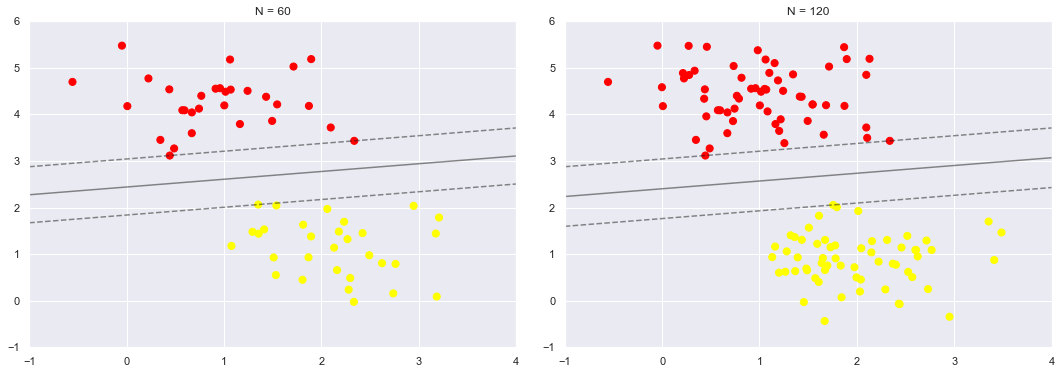

In [10]:
 def plot_svm(N=10, ax=None):            
        X, y = make_blobs(n_samples=N, centers=2,                              
                          random_state=0, cluster_std=0.60)            
        X = X[:N]            
        y = y[:N]            
        model = SVC(kernel='linear', C=1E10)           
        model.fit(X, y) 
 
        ax = ax or plt.gca()            
        ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')            
        ax.set_xlim(-1, 4)            
        ax.set_ylim(-1, 6)            
        plot_svc_decision_function(model, ax) 
 
 fig, ax = plt.subplots(1, 2, figsize=(16, 6))        
 fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)        
 for axi, N in zip(ax, [60, 120]):            
        plot_svm(N, axi)            
        axi.set_title('N = {0}'.format(N))


In [11]:
 from ipywidgets import interact, fixed         
 interact(plot_svm, N=[10, 200], ax=fixed(None));


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnTicsIG9wdGlvbnM9KDEwLCAyMDApLCB2YWx1ZT0xMCksIE91dHB1dCgpKSwgX2RvbV9jbGFzc2VzPSh1J3dpZGfigKY=


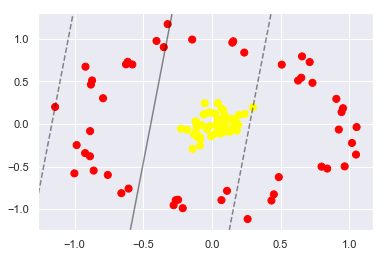

In [12]:
 from sklearn.datasets.samples_generator import make_circles         
 X, y = make_circles(100, factor=.1, noise=.1) 
 
 clf = SVC(kernel='linear').fit(X, y) 
 
 plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')         
 plot_svc_decision_function(clf, plot_support=False);


In [13]:
 r = np.exp(-(X ** 2).sum(1))


In [14]:
from mpl_toolkits import mplot3d 
 
def plot_3D(elev=30, azim=30, X=X, y=y):             
    ax = plt.subplot(projection='3d')             
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')             
    ax.view_init(elev=elev, azim=azim)             
    ax.set_xlabel('x')             
    ax.set_ylabel('y')             
    ax.set_zlabel('r') 
 
interact(plot_3D, elev=[-90, 90], azip=(-180, 180),                  
         X=fixed(X), y=fixed(y));


aW50ZXJhY3RpdmUoY2hpbGRyZW49KERyb3Bkb3duKGRlc2NyaXB0aW9uPXUnZWxldicsIG9wdGlvbnM9KC05MCwgOTApLCB2YWx1ZT0tOTApLCBJbnRTbGlkZXIodmFsdWU9MzAsIGRlc2NyaXDigKY=


In [15]:
clf = SVC(kernel='rbf', C=1E6)         
clf.fit(X, y) 

C:\Users\dell\Anaconda_adam\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

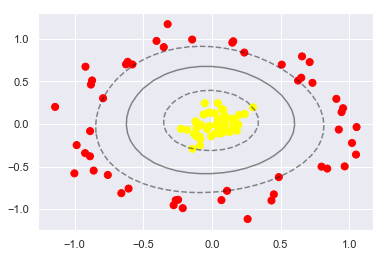

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')         
plot_svc_decision_function(clf)         
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],                     
            s=300, lw=1, facecolors='none');


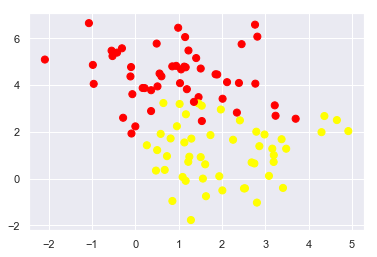

In [17]:
X, y = make_blobs(n_samples=100, centers=2,                           
                  random_state=0, cluster_std=1.2)         
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


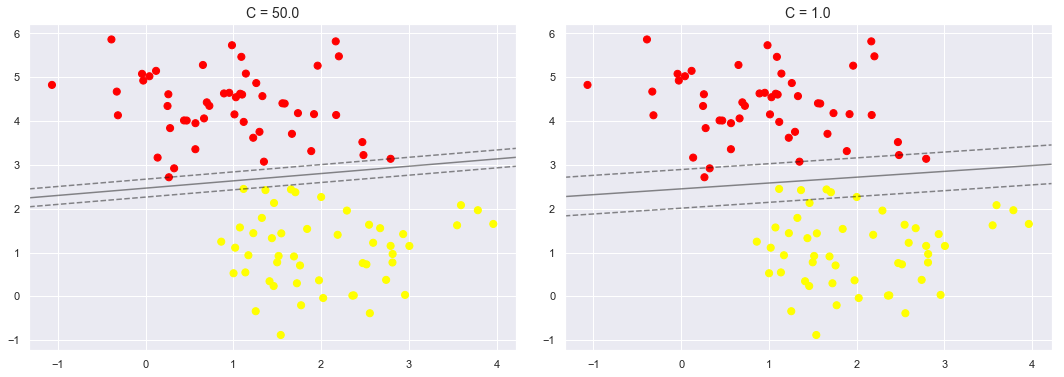

In [20]:
X, y = make_blobs(n_samples=100, centers=2,                           
                  random_state=0, cluster_std=0.8) 
 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))       
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) 
 
for axi, C in zip(ax, [50.0, 1]):             
    model = SVC(kernel='linear', C=C).fit(X, y)             
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')             
    plot_svc_decision_function(model, axi)             
    axi.scatter(model.support_vectors_[:, 0],                         
                model.support_vectors_[:, 1],                         
                s=300, lw=1, facecolors='none');             
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [ ]:
from sklearn.datasets import fetch_lfw_people         
faces = fetch_lfw_people(min_faces_per_person=60)         
print(faces.target_names)         
print(faces.images.shape) 

NameError: name 'faces' is not defined

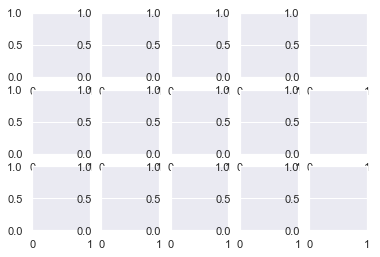

In [23]:
fig, ax = plt.subplots(3, 5)         
for i, axi in enumerate(ax.flat):             
    axi.imshow(faces.images[i], cmap='bone')             
    axi.set(xticks=[], yticks=[],                     
            xlabel=faces.target_names[faces.target[i]])


In [24]:
from sklearn.svm import SVC         
from sklearn.decomposition import RandomizedPCA         
from sklearn.pipeline import make_pipeline 
 
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)     
svc = SVC(kernel='rbf', class_weight='balanced')         
model = make_pipeline(pca, svc)


ImportError: cannot import name RandomizedPCA